Jupyter notebook attached to quickly visualise code results

In [11]:
#first run these dependencies to allow cells below to run
import numpy as np
from matplotlib import pyplot as plt
import resource.pulseshape as pulse
import resource.operators as op
import resource.ramanfunction as rf 
from copy import deepcopy

In [45]:
#define numerical parameters
b2 = 0.001 #in ps^2m^-1
stepsize = 5 #in meters
gamma = 0.001
steps = 1000 #z steps - s.t. total length = steps * stepsize in meters
timeNum = 1024 #number of time samples
t1 = -20 #start time in ps
t2 = 20 #end time in ps
samplingRate = timeNum/(t2-t1) #samples per picosecond
t = np.linspace(t1,t2,timeNum)
gaussPulseInitial = pulse.GaussianPulse(t,1)

Test output for RK method below

(-10.0, 10.0)

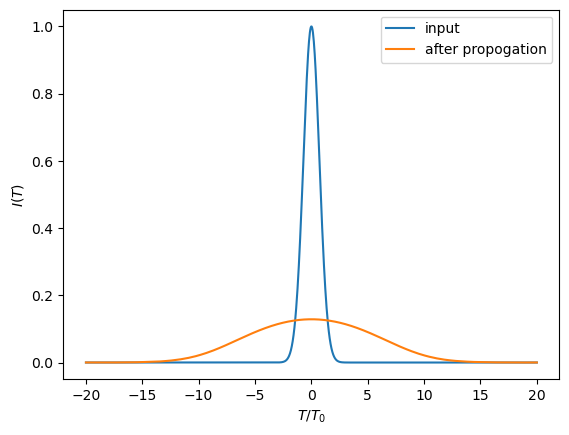

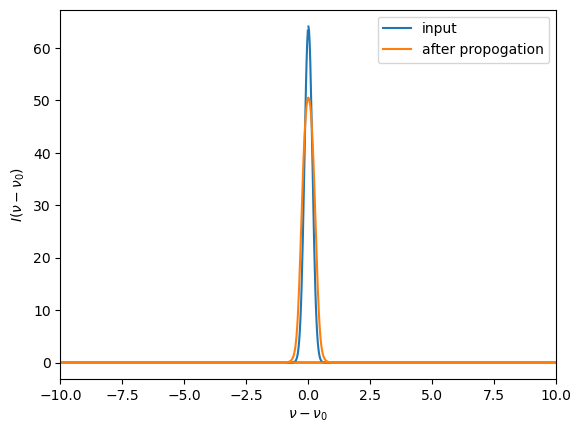

In [46]:
gaussPulse = op.BasicRK4IP(gaussPulseInitial,b2,gamma,stepsize,samplingRate)
for i in range(steps-1):
    gaussPulse = op.BasicRK4IP(gaussPulse,b2,gamma,stepsize,samplingRate)

initialFT = np.fft.fft(gaussPulseInitial)
propFT = np.fft.fft(gaussPulse)
freqs = np.fft.fftfreq(timeNum,1/samplingRate)
#plot results
plt.plot(t,np.square(gaussPulseInitial),label = "input")
plt.plot(t,np.square(np.abs(gaussPulse)),label = "after propogation")
plt.legend(loc="best")
plt.ylabel(r"$I(T)$")
plt.xlabel(r"$T/T_0$")
plt.figure()
plt.plot(freqs,np.abs(initialFT),label = "input")
plt.plot(freqs,np.abs(propFT),label = "after propogation")
plt.legend(loc="best")
plt.ylabel(r"$I(\nu - \nu_0)$")
plt.xlabel(r"$\nu - \nu_0$")
plt.xlim(-10,10)

(-10.0, 10.0)

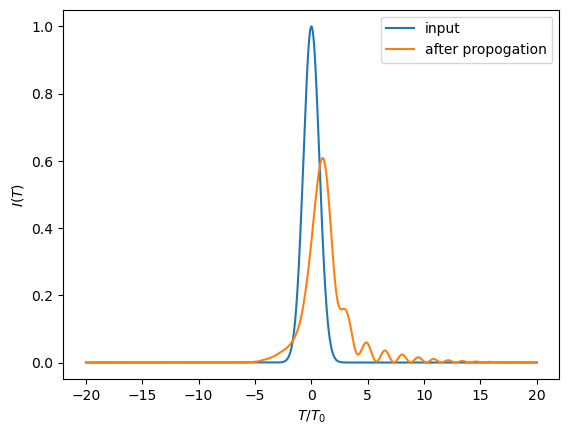

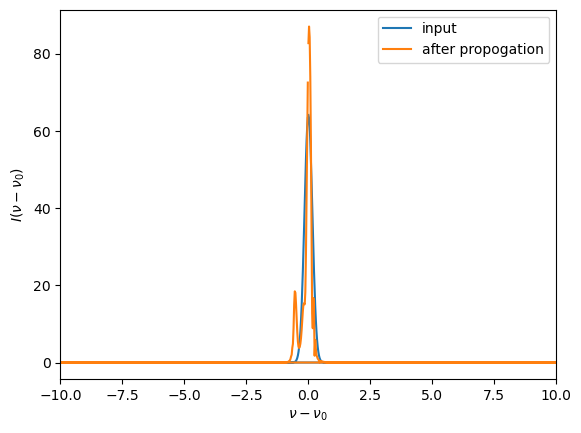

In [49]:
#testing generalised GVD version of RK4IP
attenuation = 0
dispersionList = [-b2,b2] # should give the same result as above when we only consider beta_2

#to visualize in 2d, save pulse at each z
pulse2d = []
gaussPulse = op.GeneralGVDRK4IP(dispersionList,attenuation,gamma,stepsize,samplingRate,gaussPulseInitial)
pulse2d.append(deepcopy(gaussPulse))
for i in range(steps-1):
    gaussPulse = op.GeneralGVDRK4IP(dispersionList,attenuation,gamma,stepsize,samplingRate,gaussPulse)
    pulse2d.append(deepcopy(gaussPulse))
pulse2d = np.array(pulse2d)

initialFT = np.fft.fft(gaussPulseInitial)
propFT = np.fft.fft(gaussPulse)
freqs = np.fft.fftfreq(timeNum,1/samplingRate)
#plot results
plt.plot(t,np.square(gaussPulseInitial),label = "input")
plt.plot(t,np.square(np.abs(gaussPulse)),label = "after propogation")
plt.legend(loc="best")
plt.ylabel(r"$I(T)$")
plt.xlabel(r"$T/T_0$")
plt.figure()
plt.plot(freqs,np.abs(initialFT),label = "input")
plt.plot(freqs,np.abs(propFT),label = "after propogation")
plt.legend(loc="best")
plt.ylabel(r"$I(\nu - \nu_0)$")
plt.xlabel(r"$\nu - \nu_0$")
plt.xlim(-10,10)



Text(0.5, 0, '$\\tau(ps)$')

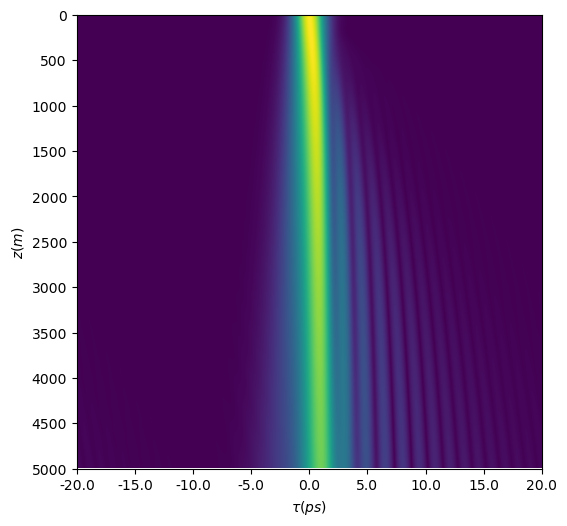

In [50]:
plt.figure(figsize = (6,6))
plt.imshow(np.abs(pulse2d))
plt.yticks(np.arange(0,steps+1,100),[dstep*stepsize for dstep in np.arange(0,steps+1,100)])
plt.xticks(np.arange(0,timeNum+1,128),np.round(np.linspace(t1,t2,9),0))
plt.ylabel("$z(m)$")
plt.xlabel(r"$\tau(ps)$")